<a href="https://colab.research.google.com/github/sanathorat/canteen-backend/blob/main/outfitrecsystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install requests


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 29ms/step - accuracy: 0.7215 - loss: 0.7710 - val_accuracy: 0.8528 - val_loss: 0.3918
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 27ms/step - accuracy: 0.8607 - loss: 0.3909 - val_accuracy: 0.8805 - val_loss: 0.3227
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.8810 - loss: 0.3280 - val_accuracy: 0.8923 - val_loss: 0.2953
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.8908 - loss: 0.3060 - val_accuracy: 0.8935 - val_loss: 0.2915
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.9007 - loss: 0.2762 - val_accuracy: 0.9007 - val_loss: 0.2735

🧥 Recommending a 'Casual' outfit...



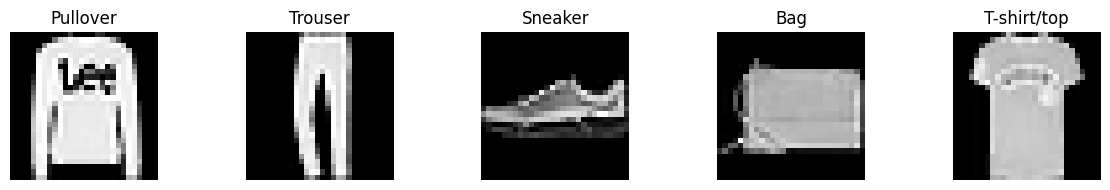

✅ Outfit recommendation complete.


In [4]:
# Step 1: Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Step 2: Load and preprocess data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Step 3: Build the model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Step 4: Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

# Step 5: Define style mapping
style_mapping = {
    'casual': ['T-shirt/top', 'Trouser', 'Sneaker', 'Pullover', 'Bag'],
    'formal': ['Shirt', 'Trouser', 'Coat', 'Ankle boot', 'Bag'],
    'party': ['Dress', 'Sandal', 'Bag', 'Coat'],
    'sporty': ['T-shirt/top', 'Sneaker', 'Trouser', 'Bag'],
}

# Step 6: Define outfit recommendation function
import random

def recommend_outfit_by_style(style, model):
    if style not in style_mapping:
        print("❌ Unknown style. Choose from:", list(style_mapping.keys()))
        return

    desired_categories = style_mapping[style]
    predicted_items = []
    collected_classes = set()

    print(f"\n🧥 Recommending a '{style.capitalize()}' outfit...\n")

    for i in range(len(x_test)):
        img = x_test[i].reshape(1, 28, 28, 1)
        prediction = model.predict(img, verbose=0)
        class_idx = np.argmax(prediction)
        class_label = class_names[class_idx]

        if class_label in desired_categories and class_label not in collected_classes:
            collected_classes.add(class_label)
            predicted_items.append((x_test[i], class_label))

        if len(predicted_items) == len(desired_categories):
            break

    # Display recommended images
    plt.figure(figsize=(12, 2))
    for i, (img, label) in enumerate(predicted_items):
        plt.subplot(1, len(predicted_items), i+1)
        plt.imshow(img.reshape(28, 28), cmap="gray")
        plt.title(label)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

    print("✅ Outfit recommendation complete.")

# Step 7: Run a test
recommend_outfit_by_style("casual", model)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


<Figure size 1000x800 with 0 Axes>

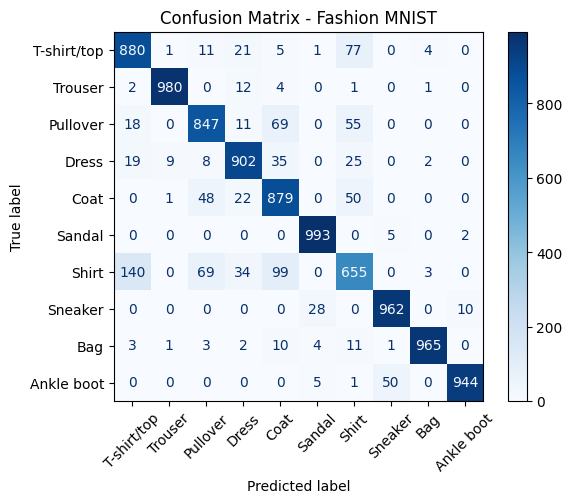

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step X: Generate predictions on test set
y_pred_probs = model.predict(x_test)   # Probabilities
y_pred = np.argmax(y_pred_probs, axis=1)   # Convert to class indices
y_true = np.argmax(y_test, axis=1)        # True labels

# Step X: Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step X: Display confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix - Fashion MNIST")
plt.show()


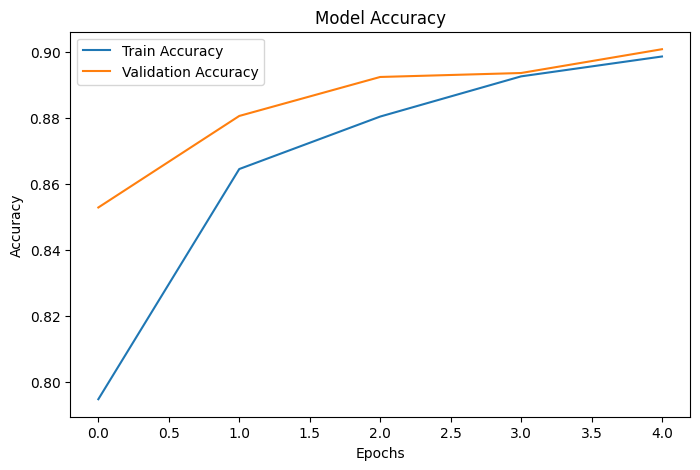

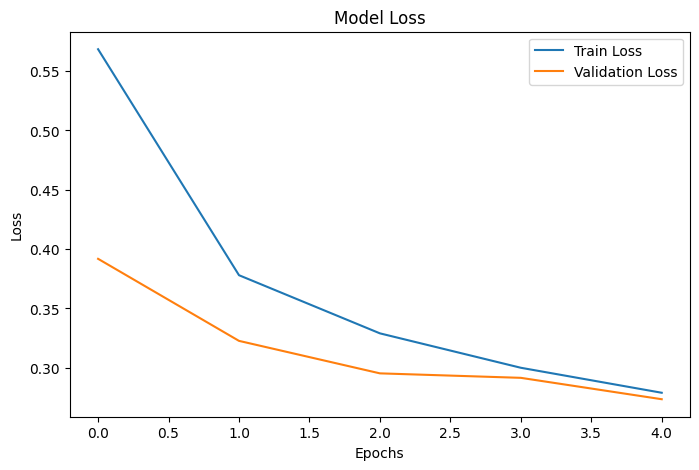

In [6]:
import matplotlib.pyplot as plt

# Training vs Validation Accuracy
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Training vs Validation Loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


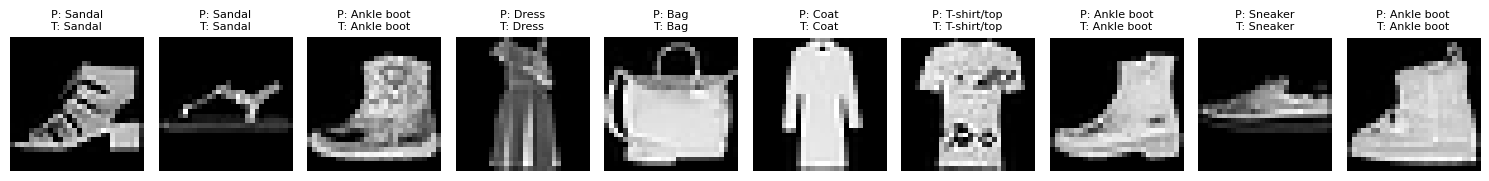

In [7]:
import random

def show_sample_predictions(n=10):
    plt.figure(figsize=(15, 4))
    for i in range(n):
        idx = random.randint(0, len(x_test)-1)
        img = x_test[idx].reshape(1, 28, 28, 1)
        pred = np.argmax(model.predict(img, verbose=0))
        true = np.argmax(y_test[idx])

        plt.subplot(1, n, i+1)
        plt.imshow(x_test[idx].reshape(28, 28), cmap="gray")
        plt.title(f"P: {class_names[pred]}\nT: {class_names[true]}", fontsize=8)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

show_sample_predictions()
